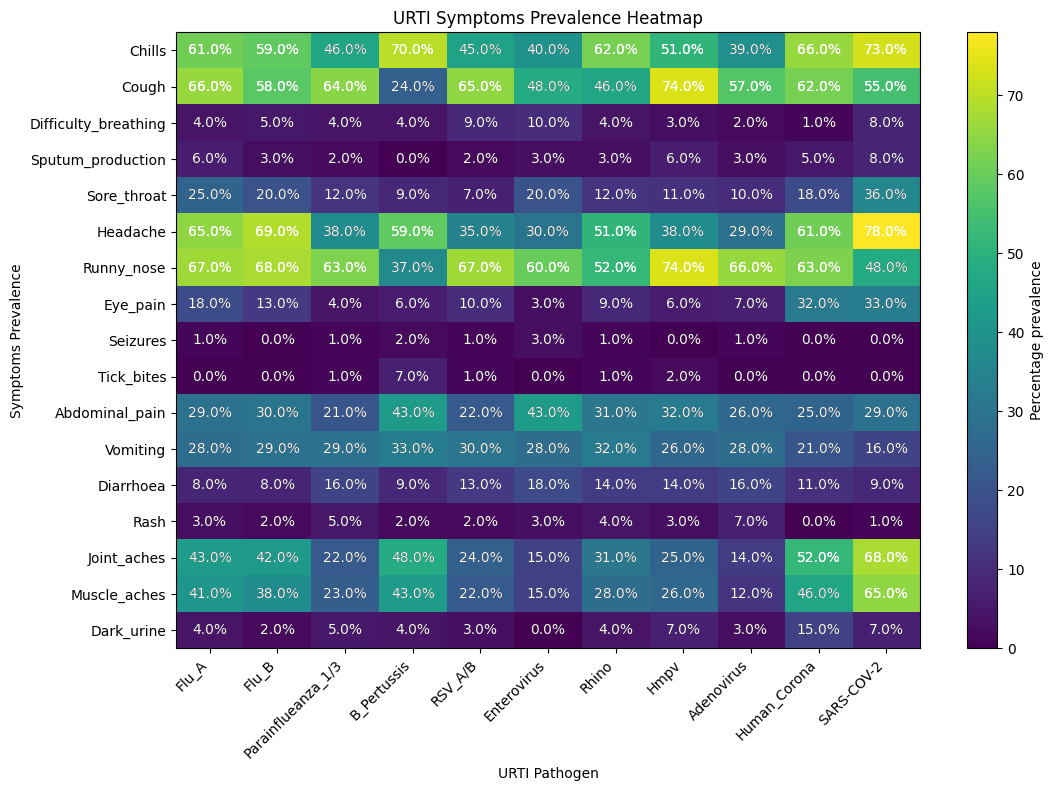

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Symptoms': ['Chills', 'Cough', 'Difficulty_breathing', 'Sputum_production', 'Sore_throat', 'Headache', 'Runny_nose', 'Eye_pain', 'Seizures', 'Tick_bites', 'Abdominal_pain', 'Vomiting', 'Diarrhoea', 'Rash', 'Joint_aches', 'Muscle_aches', 'Dark_urine'],
    'Flu_A': [61, 66, 4, 6, 25, 65, 67, 18, 1, 0, 29, 28, 8, 3, 43, 41, 4],
    'Flu_B': [59, 58, 5, 3, 20, 69, 68, 13, 0, 0, 30, 29, 8, 2, 42, 38, 2],
    'Parainflueanza_1/3': [46, 64, 4, 2, 12, 38, 63, 4, 1, 1, 21, 29, 16, 5, 22, 23, 5],
    'B_Pertussis': [70, 24, 4, 0, 9, 59, 37, 6, 2, 7, 43, 33, 9, 2, 48, 43, 4],
    'RSV_A/B': [45, 65, 9, 2, 7, 35, 67, 10, 1, 1, 22, 30, 13, 2, 24, 22, 3],
    'Enterovirus': [40, 48, 10, 3, 20, 30, 60, 3, 3, 0, 43, 28, 18, 3, 15, 15, 0],
    'Rhino': [62, 46, 4, 3, 12, 51, 52, 9, 1, 1, 31, 32, 14, 4, 31, 28, 4],
    'Hmpv': [51, 74, 3, 6, 11, 38, 74, 6, 0, 2, 32, 26, 14, 3, 25, 26, 7],
    'Adenovirus': [39, 57, 2, 3, 10, 29, 66, 7, 1, 0, 26, 28, 16, 7, 14, 12, 3],
    'Human_Corona': [66, 62, 1, 5, 18, 61, 63, 32, 0, 0, 25, 21, 11, 0, 52, 46, 15],
    'SARS-COV-2': [73, 55, 8, 8, 36, 78, 48, 33, 0, 0, 29, 16, 9, 1, 68, 65, 7]
}
# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the 'Symptoms' column as the index
df.set_index('Symptoms', inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(df, cmap='viridis', aspect='auto', interpolation='nearest')

# Annotate each cell with its respective value
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        plt.text(j, i, f'{df.iloc[i, j]:.1f}%', ha='center', va='center', color='white' if df.iloc[i, j] > 50 else 'black')

# Set the x-axis ticks and labels
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')

# Set the y-axis ticks and labels
plt.yticks(range(len(df.index)), df.index)

# Display the colorbar
plt.colorbar(label='Percentage prevalence')

# Add percentage values in white text
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        plt.text(j, i, f'{df.iloc[i, j]:.1f}%', color='white', ha='center', va='center')

# Set the plot title and labels
plt.title('URTI Symptoms Prevalence Heatmap')
plt.xlabel('URTI Pathogen')
plt.ylabel('Symptoms Prevalence')

# Show the plot
plt.show()

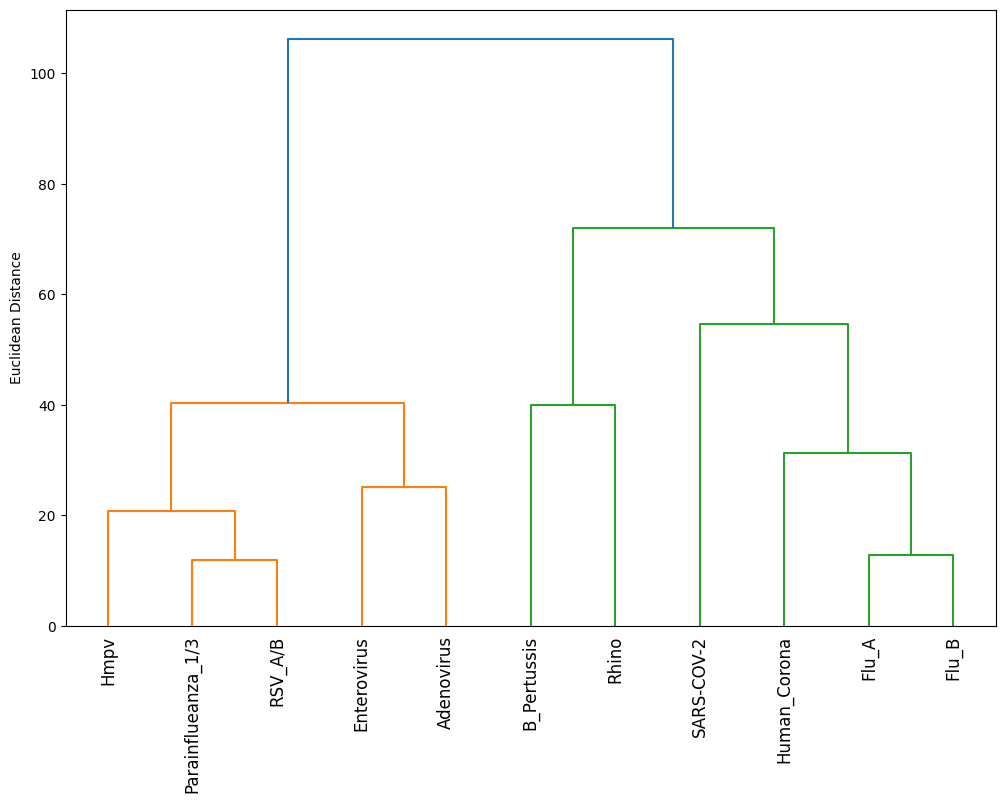

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Data
data = {
    'Symptoms': ['Chills', 'Cough', 'Difficulty_breathing', 'Sputum_production', 'Sore_throat', 'Headache', 'Runny_nose', 'Eye_pain', 'Seizures', 'Tick_bites', 'Abdominal_pain', 'Vomiting', 'Diarrhoea', 'Rash', 'Joint_aches', 'Muscle_aches', 'Dark_urine'],
    'Flu_A': [61, 66, 4, 6, 25, 65, 67, 18, 1, 0, 29, 28, 8, 3, 43, 41, 4],
    'Flu_B': [59, 58, 5, 3, 20, 69, 68, 13, 0, 0, 30, 29, 8, 2, 42, 38, 2],
    'Parainflueanza_1/3': [46, 64, 4, 2, 12, 38, 63, 4, 1, 1, 21, 29, 16, 5, 22, 23, 5],
    'B_Pertussis': [70, 24, 4, 0, 9, 59, 37, 6, 2, 7, 43, 33, 9, 2, 48, 43, 4],
    'RSV_A/B': [45, 65, 9, 2, 7, 35, 67, 10, 1, 1, 22, 30, 13, 2, 24, 22, 3],
    'Enterovirus': [40, 48, 10, 3, 20, 30, 60, 3, 3, 0, 43, 28, 18, 3, 15, 15, 0],
    'Rhino': [62, 46, 4, 3, 12, 51, 52, 9, 1, 1, 31, 32, 14, 4, 31, 28, 4],
    'Hmpv': [51, 74, 3, 6, 11, 38, 74, 6, 0, 2, 32, 26, 14, 3, 25, 26, 7],
    'Adenovirus': [39, 57, 2, 3, 10, 29, 66, 7, 1, 0, 26, 28, 16, 7, 14, 12, 3],
    'Human_Corona': [66, 62, 1, 5, 18, 61, 63, 32, 0, 0, 25, 21, 11, 0, 52, 46, 15],
    'SARS-COV-2': [73, 55, 8, 8, 36, 78, 48, 33, 0, 0, 29, 16, 9, 1, 68, 65, 7]
}
# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the 'Symptoms' column as the index
df.set_index('Symptoms', inplace=True)

# Perform hierarchical clustering
linkage_matrix = linkage(df.transpose(), method='complete', metric='euclidean')

# Create the heatmap
plt.figure(figsize=(12, 8))

# Plot the dendrogram for the columns (pathogens)
dendrogram(linkage_matrix, labels=df.columns, leaf_rotation=90)

# Set the y-axis label
plt.ylabel('Euclidean Distance')

# Show the plot
plt.show()